<a href="https://colab.research.google.com/github/SAMMOSES26/task6-assignment8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

# **part 1**

**cleaning data**

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [6]:
df.shape

(804, 12)

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
iqr=df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
upper_threshold=df['Mileage'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Mileage'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

# we find outliers in Mileage

(41097.25, -1260.75)

In [10]:
# treating outliers in milage column

df.Mileage = df.Mileage.clip(-1260.75,41097.25)

**EDA**

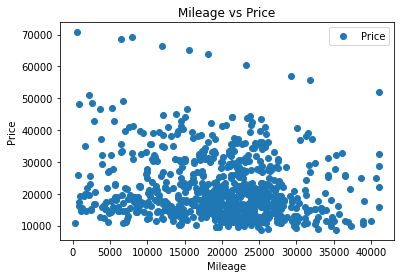

In [11]:
# we use scaterplot because we have continues data in features and target 
df.plot(x='Mileage', y='Price', style='o')  # style='o' means scatterplot
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [12]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


**no linear relationship so trying transform**

In [13]:
import numpy as np
df['transformed_Milage'] = np.exp(df['Mileage']) # transformation
df[['transformed_Milage','Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,transformed_Milage,Price
transformed_Milage,NaN,-0.0
Price,-0.0,1.0


1) There is no linear relationship between Milage and Price
2) Have tried all trasnformations - still not able to see a good linear relationship

**splitting**

In [14]:
X = df[['Mileage']].values # there is linear relationship in cylinder,liter,cruise so selected
y = df['Price'].values #array of targets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**scaling**

In [16]:
# from sklearn.preprocessing import StandardScaler ## standrard scalig 
# scaler = StandardScaler() #initialise to a variable
# scaler.fit(X_train) # we are finding the values of mean and sd from the td
# X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
# X_test_scaled = scaler.transform(X_test) # transform the test data 

**fitting Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
coeff_df = pd.DataFrame(regressor.coef_,['Milage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Milage,-0.193341


In [19]:
regressor.intercept_ 

25461.178271775647

In [20]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,12284.288290,20677.926484
1,11903.097747,20572.555739
2,21683.031464,20283.704560
3,16536.743875,20778.850390
4,17542.036083,23695.009918
...,...,...
237,10770.106554,20615.090719
238,12684.986227,19682.027941
239,25589.983155,25014.947668
240,32737.084546,21766.048596


**R2 score**

In [21]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.004627540459226531


The equation for Milage vs Price is not a good fit because the r2 score is almost 0 

# **part-2**

In [22]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'transformed_Milage'],
      dtype='object')

In [23]:
# no outliers in Cylinder
iqr=df['Cylinder'].quantile(0.75) - df['Cylinder'].quantile(0.25)
upper_threshold=df['Cylinder'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Cylinder'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(9.0, 1.0)

In [24]:
# no outliers in Liter
iqr=df['Liter'].quantile(0.75) - df['Liter'].quantile(0.25)
upper_threshold=df['Liter'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Liter'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.199999999999999, -0.1999999999999993)

In [25]:
# no outliers in Doors
iqr=df['Doors'].quantile(0.75) - df['Doors'].quantile(0.25)
upper_threshold=df['Doors'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Doors'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(4.0, 4.0)

In [26]:
# no outliers in Cruise
iqr=df['Cruise'].quantile(0.75) - df['Cruise'].quantile(0.25)
upper_threshold=df['Cruise'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Cruise'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(1.0, 1.0)

In [27]:
# no outliers in Sound
iqr=df['Sound'].quantile(0.75) - df['Sound'].quantile(0.25)
upper_threshold=df['Sound'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Sound'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [28]:
# no outliers in Leather
iqr=df['Leather'].quantile(0.75) - df['Leather'].quantile(0.25)
upper_threshold=df['Leather'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Leather'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

**EDA**

In [29]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'transformed_Milage'],
      dtype='object')

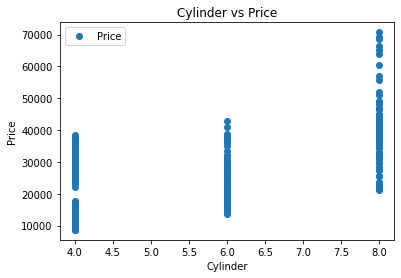

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [30]:
#Cylinder vs Price
#df.groupby('Cylinder')['Price'].mean().plot()
df.plot(x='Cylinder', y='Price', style='o')  # style='o' means scatterplot
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()
df[['Cylinder','Price']].corr()

**there is a linear relationship between cylinder vs price** 

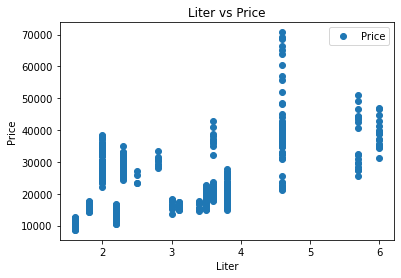

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [31]:
#Liter vs Price
#df.groupby('Liter')['Price'].mean().plot()
df.plot(x='Liter', y='Price', style='o')  # style='o' means scatterplot
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()
df[['Liter','Price']].corr()

**There is linear realtionship between Liter vs Price**

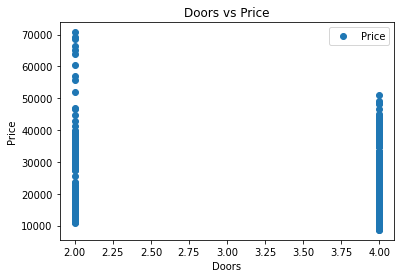

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [32]:
#Doors vs Price
#df.groupby('Doors')['Price'].mean().plot()
df.plot(x='Doors', y='Price', style='o')  # style='o' means scatterplot
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors','Price']].corr()

**No linear realation in Doors vs Price so trying transform**

In [33]:
df['transformed_Doors'] = np.square(df['Mileage']) # transformation
df[['transformed_Doors','Price']].corr()

,transformed_Doors,Price
transformed_Doors,1.000000,-0.125361
Price,-0.125361,1.000000


**tried all transform but no linear relation**

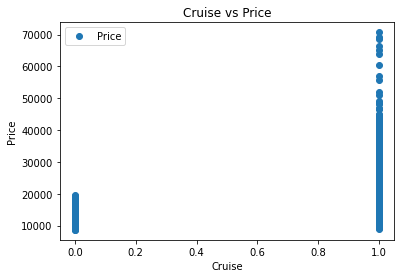

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [34]:
#Cruise vs Price
#df.groupby('Cruise')['Price'].mean().plot()
df.plot(x='Cruise', y='Price', style='o')  # style='o' means scatterplot
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()
df[['Cruise','Price']].corr()

**There is LR in Cruise vs Price**

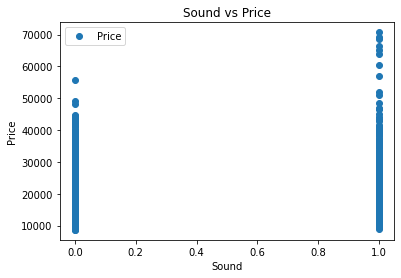

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [35]:
#Sound vs Price
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='Sound', y='Price', style='o')  # style='o' means scatterplot
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['Sound','Price']].corr()

**no LR in Sound vs Price so trying transform**

In [36]:
df['transformed_Sound'] = np.power(df['Sound'],3) # transformation)
df[['transformed_Sound','Price']].corr()

,transformed_Sound,Price
transformed_Sound,1.000000,-0.124348
Price,-0.124348,1.000000


**Have tried all transform no LR found in Sound vs Price**

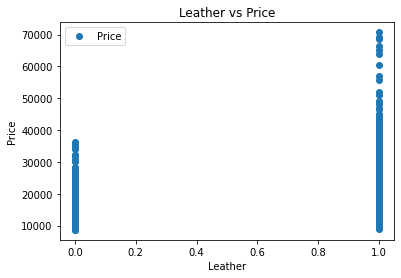

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [37]:
#Leather vs Price
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='Leather', y='Price', style='o')  # style='o' means scatterplot
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()
df[['Leather','Price']].corr()

**no LR found in Leater vs Price so trying transform**

In [38]:
df['transformed_Leather'] = np.power(df['Leather'],3) # transformation
df[['transformed_Leather','Price']].corr()

,transformed_Leather,Price
transformed_Leather,1.000000,0.157197
Price,0.157197,1.000000


**no LR found after transform in Leather vs Price**

In our dataset we found linear relationship only in Cyliner,Liter,Cruise

splitting data & Fitting the model

In [39]:
X=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y=df['Price']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**fitting the model**

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Mileage,-1667.810517
Cylinder,7529.338586
Liter,-2869.769621
Doors,-1655.300385
Cruise,2826.358495
Sound,-1061.902342
Leather,1564.323684


In [44]:
regressor.intercept_ 

21350.398326860333

In [45]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
421,17119.457572,25573.700573
58,19191.989617,22532.068623
109,34685.662980,34374.013807
703,31554.405335,17460.855399
9,15295.018267,24746.029886
...,...,...
330,14429.789643,20617.263794
437,16267.094889,18397.118827
405,16993.780328,17948.220037
681,32053.097161,17811.457765


In [46]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.30245361267896054


**finding best combination of fators**

In [47]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'transformed_Milage',
       'transformed_Doors', 'transformed_Sound', 'transformed_Leather'],
      dtype='object')

In [48]:
# df=df.drop(columns="transformed_Milage","transformed_Doors","transformed_Sound","transformed_Leather")
df=df.drop(["transformed_Milage","transformed_Doors","transformed_Sound","transformed_Leather"], axis=1)

In [49]:
Car_Features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
Car_Price = ["Price"]
X = df[Car_Features]
Y = df[Car_Price]
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

combos = []
   
for i in range(1, 7):
    combos.append(combinations(Car_Features, i))



check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        
        model = linear_model.LinearRegression(fit_intercept=False)
            
        model = model.fit(x,Y)
        model_score = model.score(x, Y)
        if check_score < model.score(x, Y):
            check_score = model.score(x, Y)
            maxgroup = groupx
            
print(maxgroup, 'model_score =', check_score)

['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'] model_score = 0.4343452301434213


# **part 3**

In [50]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [51]:
dummy=pd.get_dummies(df[["Make","Model","Type"]])
dummy.head()

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
df_dummies=pd.concat([df["Price"],dummy],axis=1)
df_dummies.head()

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
#import label encoder

from sklearn import preprocessing

#label encoder object knows how to understand word labels

label_encoder = preprocessing.LabelEncoder()
for i in ["Make","Model","Trim","Type"]:
  df[i]=label_encoder.fit_transform(df[i])

df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342.0,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832.0,0,10,44,3,6,3.1,4,1,0,1


In [54]:
car_Features=list(df.columns)[1:]
X=df.iloc[:,1:]
Y=df.Price

In [55]:
Car_Features = list(df.columns)[1:]
Car_Price = ["Price"]
X = df.iloc[:,1:]
Y = df.Price
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

combos = []
   
for i in range(1, 7):
    combos.append(combinations(Car_Features, i))



check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        
        model = linear_model.LinearRegression(fit_intercept=False)
            
        model = model.fit(x,Y)
        model_score = model.score(x, Y)
        if check_score < model.score(x, Y):
            check_score = model.score(x, Y)
            maxgroup = groupx
            
print(maxgroup, 'model_score =', check_score)

['Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Cruise'] model_score = 0.47940689616895393
